In [1]:
from SunImports import *
%load_ext autoreload
%autoreload 2

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 2.42e+03 ± 15.6 s
sigma = 0.0725 ± 0.00161



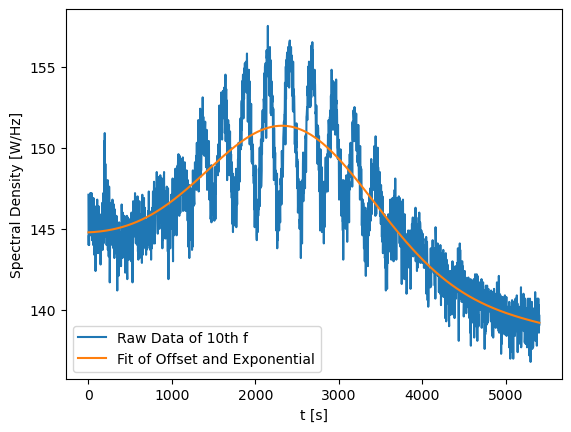

Optimal Value of Beff
----------------------------------------
Beff  = 5.83 ± 0.0261 m



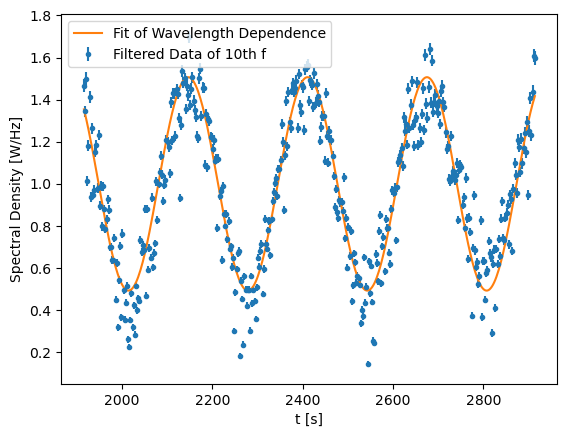

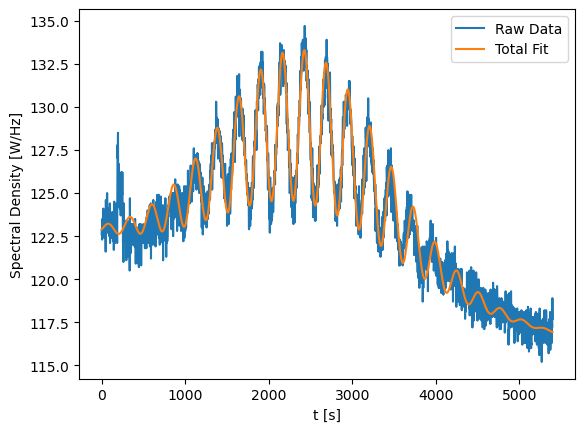

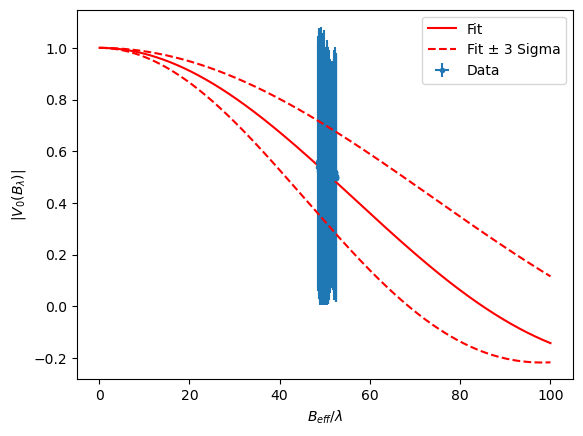

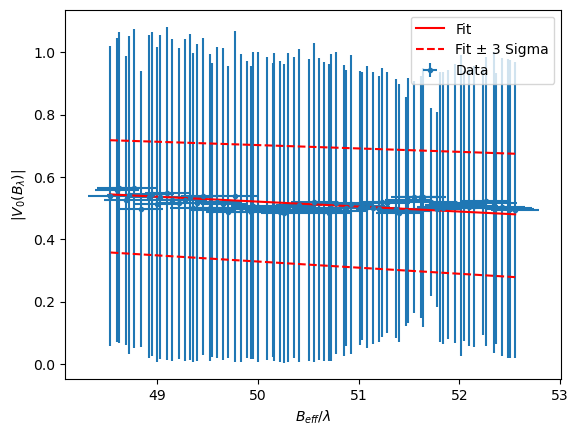

d = (1.76±0.14)×10⁹ m
alpha = 0.0118±0.0009 rad


In [2]:
files = ['Zweite Daten Sonne 10/ETH_20240110_111502_01.fit', 
         'Zweite Daten Sonne 10/ETH_20240110_113002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_114502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_120002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_121502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_123003_01.fit']
data, t, freq = glue_together(files)

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 2500, 0.065, 0.1, 145.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V01, V0_uncert1, Bl1, Bl_sig1, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
sun_diameter(V01, V0_uncert1, Bl1, Bl_sig1, p)

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 2.06e+03 ± 21.4 s
sigma = 0.0804 ± 0.00273



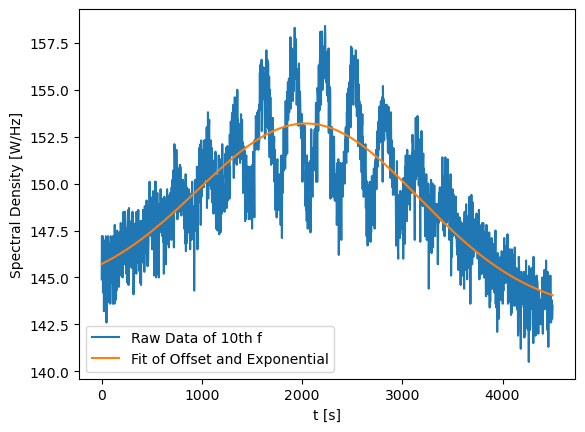

Optimal Value of Beff
----------------------------------------
Beff  = 5.08 ± 0.035 m



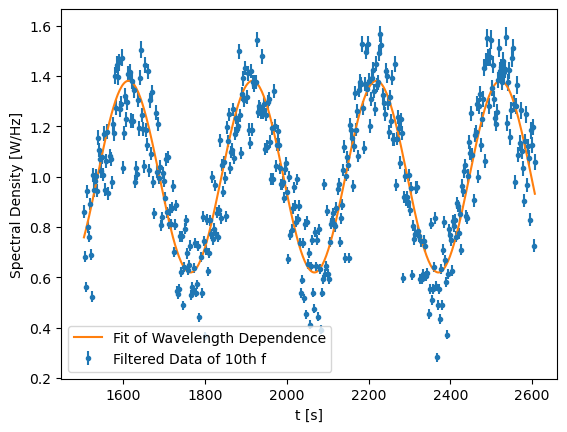

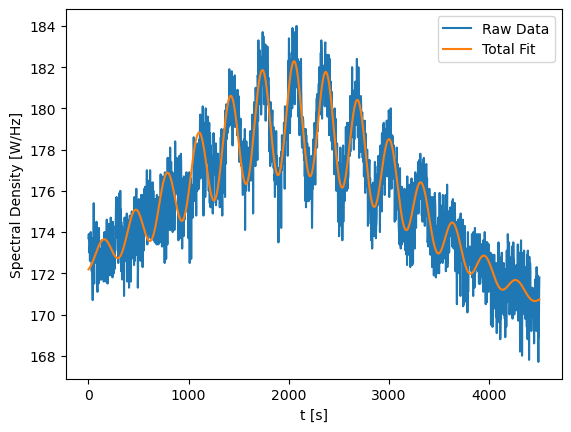

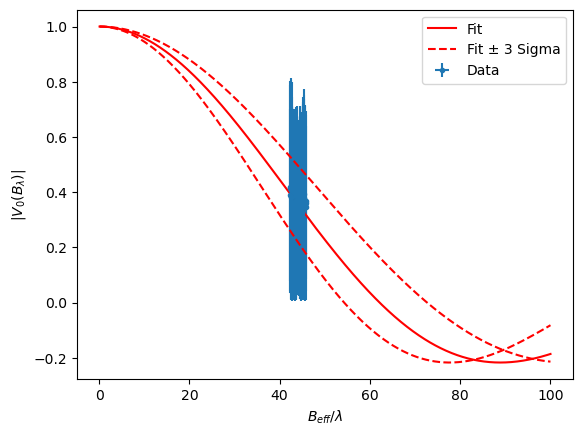

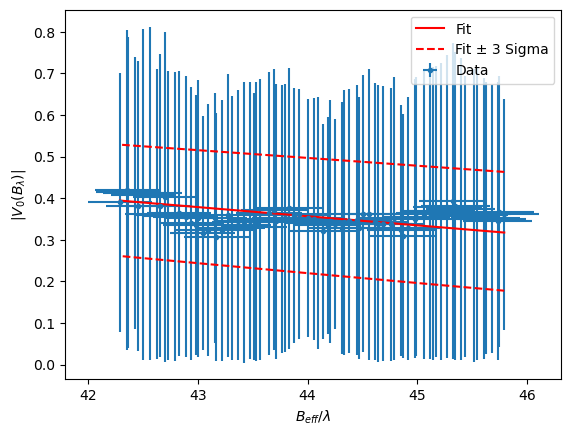

d = (2.41±0.12)×10⁹ m
alpha = 0.0161±0.0008 rad


In [3]:
files = ['Dritte Daten Sonne 10/ETH_20240110_140003_01.fit', 
         'Dritte Daten Sonne 10/ETH_20240110_141503_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_143004_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_144504_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_150004_01.fit']
data, t, freq = glue_together(files)
#plt.imshow(data, aspect='auto', extent=[t[0],t[-1],freq[-1],freq[0]])

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 2500, 0.08, 0.1, 145.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V02, V0_uncert2, Bl2, Bl_sig2, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
sun_diameter(V02, V0_uncert2, Bl2, Bl_sig2, p)

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 1.99e+03 ± 82.5 s
sigma = 0.121 ± 0.0176



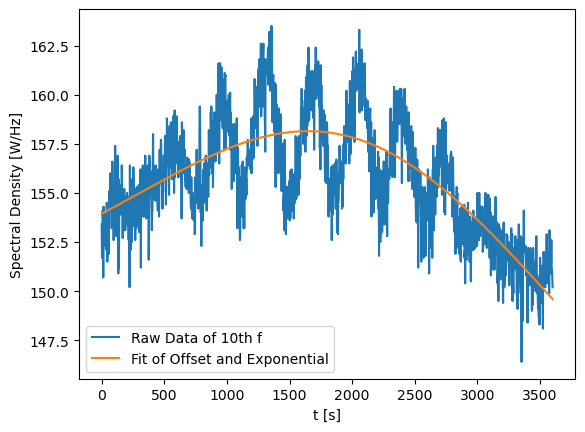

Optimal Value of Beff
----------------------------------------
Beff  = 4.23 ± 0.101 m



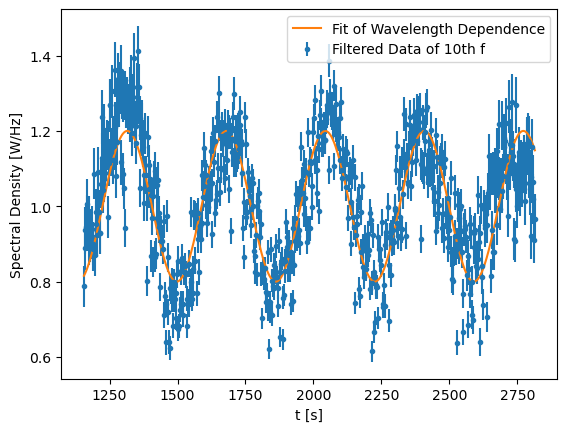

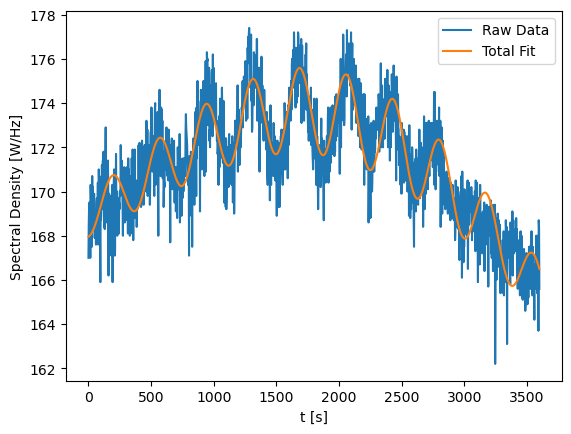

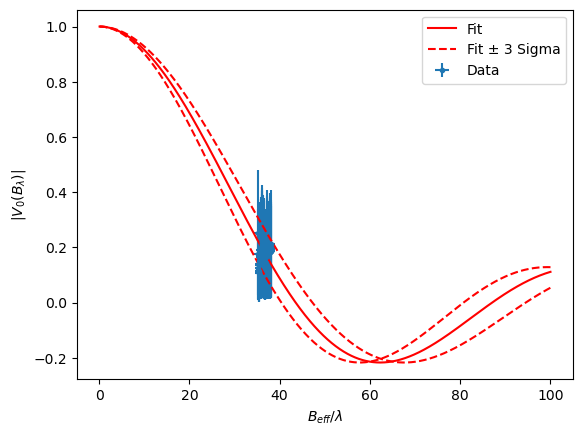

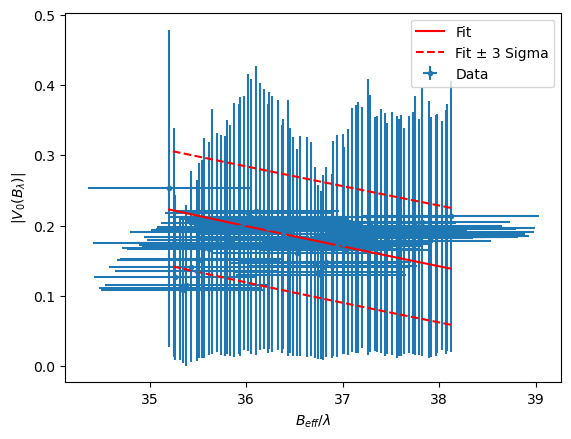

d = (3.44±0.09)×10⁹ m
alpha = 0.0230±0.0006 rad


In [4]:
files = ['Daten Sonne 11/ETH_20240111_090000_01.fit', 
         'Daten Sonne 11/ETH_20240111_091501_01.fit',
         'Daten Sonne 11/ETH_20240111_093001_01.fit',
         'Daten Sonne 11/ETH_20240111_094501_01.fit']
data, t, freq = glue_together(files)

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 1600, 0.08, 0.0, 150.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V03, V0_uncert3, Bl3, Bl_sig3, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
sun_diameter(V03, V0_uncert3, Bl3, Bl_sig3, p)

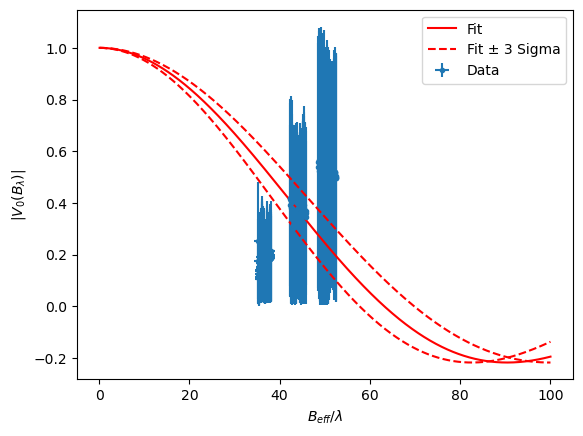

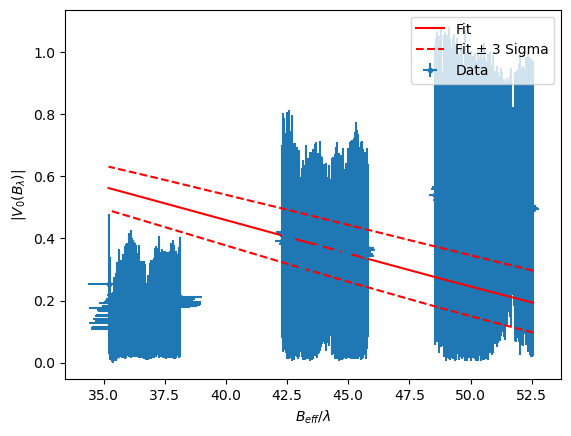

d = (2.37±0.07)×10⁹ m
alpha = 0.0158±0.0005 rad


In [5]:
# Total Fit
V0tot = np.concatenate( (V01, V02, V03) )
V0tot_uncert = np.concatenate( (V0_uncert1, V0_uncert2, V0_uncert3) )

Bltot = np.concatenate( (Bl1, Bl2, Bl3) )
Bltot_sig = np.concatenate( (Bl_sig1, Bl_sig2, Bl_sig3) )

# Fit
p = np.deg2rad(0.5)
sun_diameter(V0tot, V0tot_uncert, Bltot, Bltot_sig, p)